<a href="https://colab.research.google.com/github/sarathi-vs13/Deep-Learning/blob/main/Image_Classification_using_CNN_(CIFAR_10_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Classification using CNN (CIFAR-10 Dataset)


### **CIFAR-10** (Canadian Institute For Advanced Research) is a benchmark dataset used in machine learning and computer vision, especially for image classification tasks.

### **Contents of CIFAR-10:**

* 60,000 color images total
* 10 classes (labels)
* 6,000 images per class
* Each image is 32×32 pixels in size
* All are RGB images (3 color channels)


### **The 10 Classes (Categories)**

* Airplane
* Automobile
* Bird
* Cat
* Deer
* Dog
* Frog
* Horse
* Ship
* Truck





## Importing libraries and preprocessing of the CIFAR-10 dataset

In [28]:
# Importing Required Libraries

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [10]:
# Load and Preprocess the CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


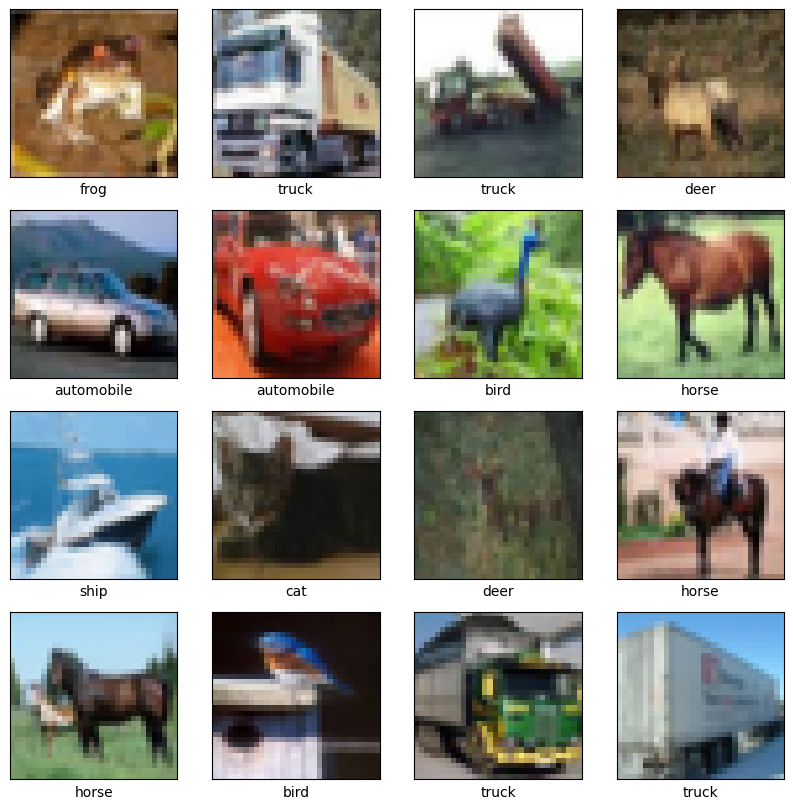

In [11]:
# Visualizing Sample Images
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])     # remove x-axis ticks
    plt.yticks([])     # remove y-axis ticks
    plt.grid(False)    # remove grid lines
    plt.imshow(x_train[i])    # show image
    plt.xlabel(class_names[y_train[i][0]])  # show label
plt.show()


## Building the CNN Model

In [27]:
# Convolutional Neural Network (CNN)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 output classes
])


In [24]:
# Compiling the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


## Training the Model

In [16]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.4604 - loss: 1.4693 - val_accuracy: 0.5557 - val_loss: 1.2122
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.5852 - loss: 1.1672 - val_accuracy: 0.6192 - val_loss: 1.0585
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.6465 - loss: 1.0001 - val_accuracy: 0.6363 - val_loss: 1.0374
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.6815 - loss: 0.9061 - val_accuracy: 0.6562 - val_loss: 0.9766
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.7083 - loss: 0.8344 - val_accuracy: 0.6910 - val_loss: 0.8967


## Evaluating the Model

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 - 4s - 14ms/step - accuracy: 0.0941 - loss: 2.3025

Test accuracy: 0.0941


## Making Predictions

In [26]:
probability_model = tf.keras.Sequential([model, layers.Softmax()])
predictions = probability_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


## Visualizing Predictions

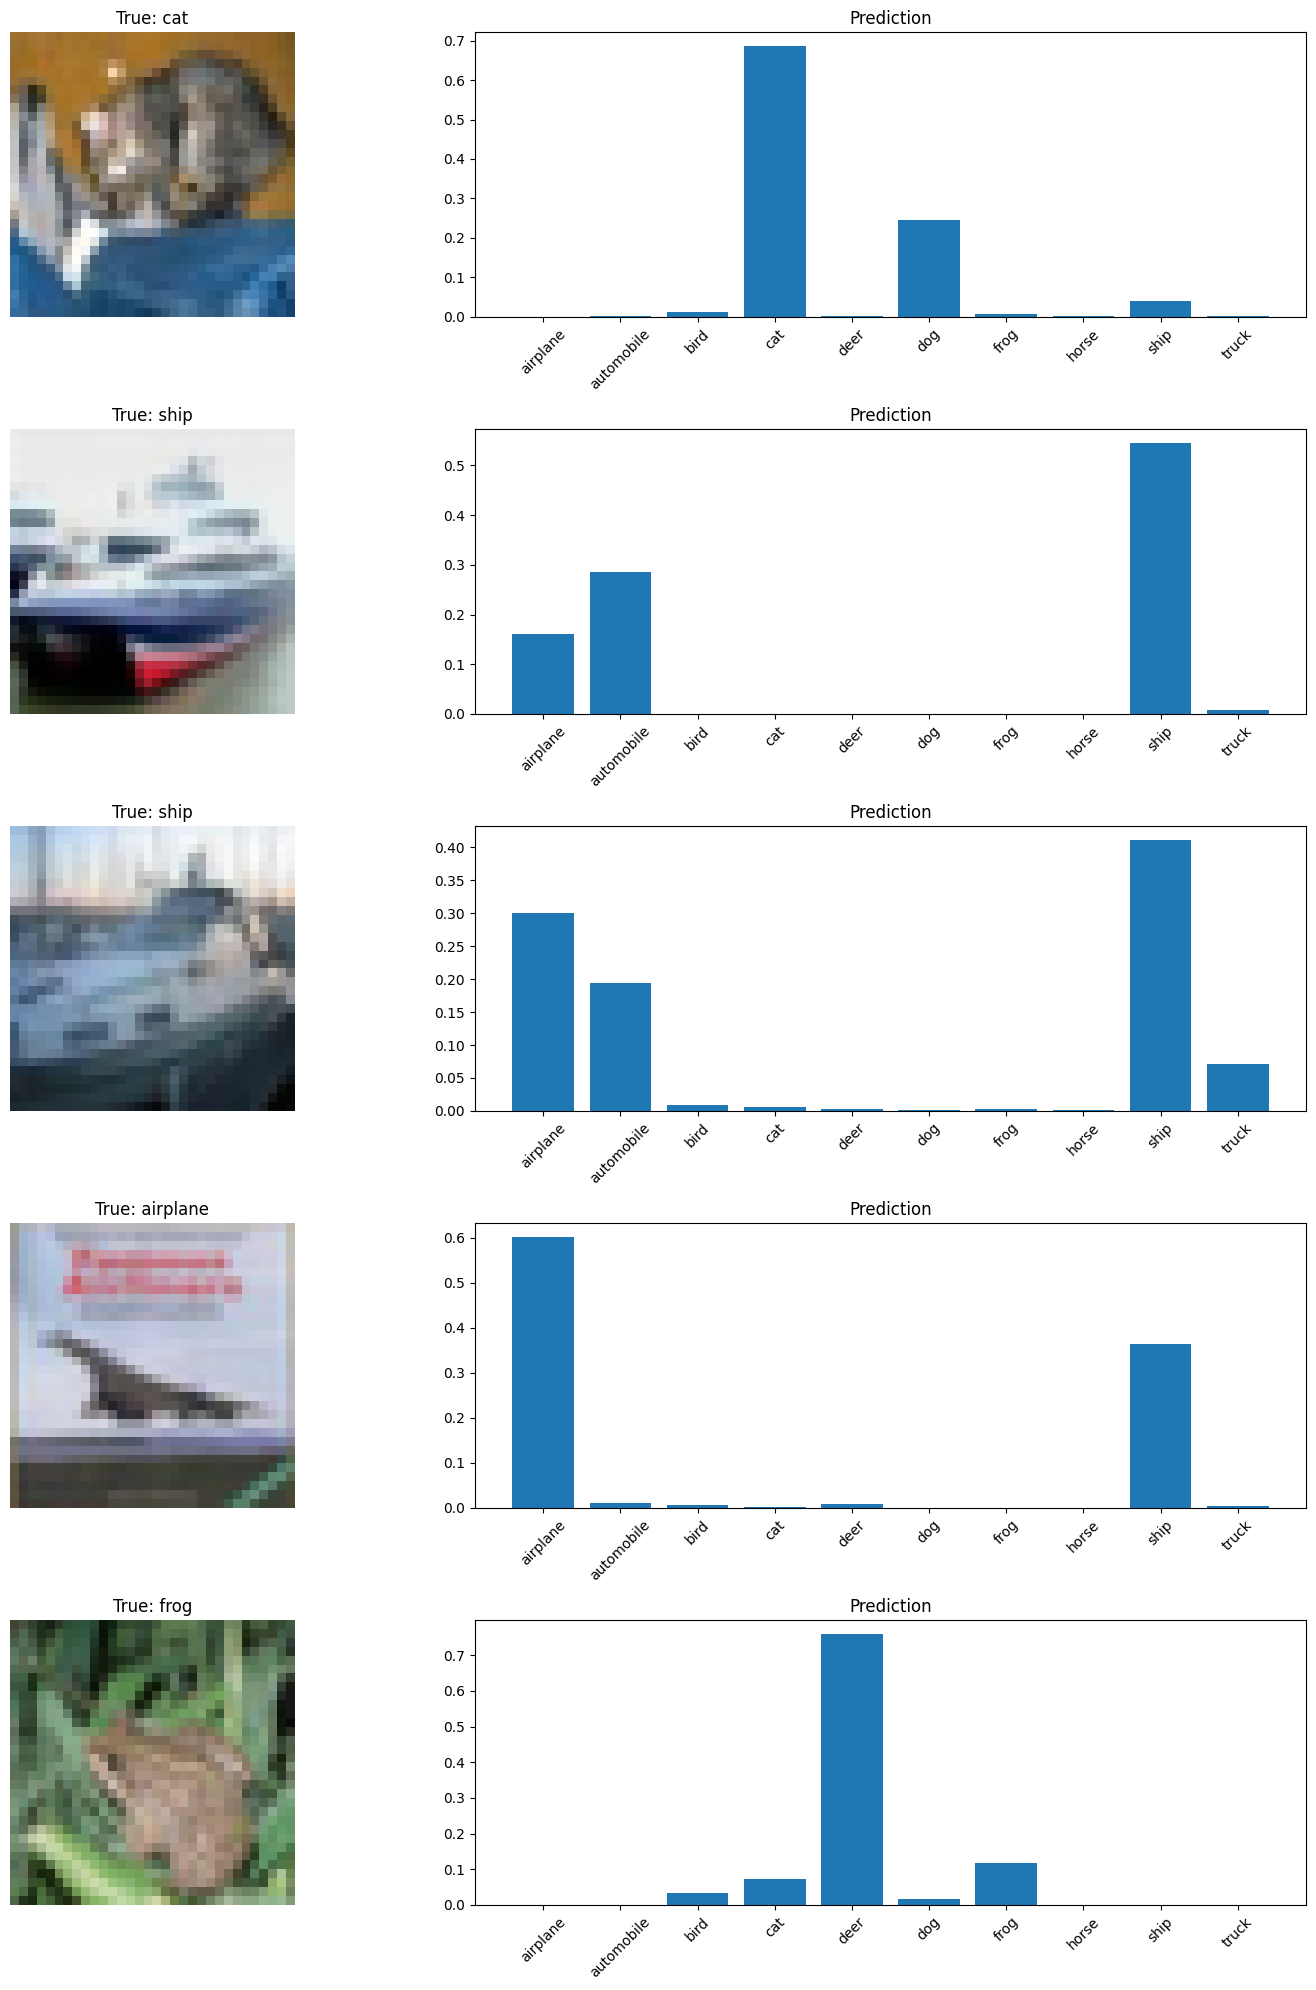

In [22]:
num_rows = 5
num_cols = 1
plt.figure(figsize=(4*4*num_cols, 4*num_rows))
for i in range(5):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.imshow(x_test[i])
    plt.title(f"True: {class_names[y_test[i][0]]}")
    plt.axis('off')

    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plt.bar(class_names, predictions[i])
    plt.title("Prediction")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
